# Tune single wake deflection

Use the 8 m/s two turbine case to tune the deflection model

Should be just yar tuning

In [1]:
import matplotlib.pyplot as plt
import floris.tools as wfct
import numpy as np
import pandas as pd
import copy
import seaborn as sns
import pickle
from scipy.optimize import minimize

## Load FLORIS models and SOWFA DATA

In [2]:
df = pickle.load( open( "sowfa_04.p", "rb" ) )
fi_dict = pickle.load( open( "floris_models_2.p", "rb" ) )

In [3]:
# df = df.iloc[:10]
df

,Precursor,case_name,floris_TI,floris_U0,layout_x,layout_y,num_turbines,path,sim_length,sowfa_TI,sowfa_U0,yaw,power,ti,wake_table,freestream_gauss,freestream_gauss_legacy,freestream_ti
casename,,,,,,,,,,,,,,,,,,
c_0,neutral_5kmx2kmx1km\n,c_08_highTI_D05_R-1_y-20,0.090,8.38,"(1000.0, 1630.0)","(1000.0, 937.0)",2,sowfa_library (Paul.fleming@nrel.gov)/full_run...,2000.0,0.10,8.0,"[-20.0, 0.0]","[1697.0, 1445.7]","[0.09703534975568191, 0.16729992046512362]","[0, 1]",8.031730,8.010499,0.097035
c_1,neutral_5kmx2kmx1km\n,c_08_highTI_D05_R-1_y00,0.090,8.38,"(1000.0, 1630.0)","(1000.0, 937.0)",2,sowfa_library (Paul.fleming@nrel.gov)/full_run...,2000.0,0.10,8.0,"[0.0, 0.0]","[1937.5, 1072.3]","[0.09297835821594881, 0.17988567028143654]","[0, 1]",8.394857,8.372666,0.092978
c_2,neutral_5kmx2kmx1km\n,c_08_highTI_D05_R-1_y20,0.090,8.38,"(1000.0, 1630.0)","(1000.0, 937.0)",2,sowfa_library (Paul.fleming@nrel.gov)/full_run...,2000.0,0.10,8.0,"[20.0, 0.0]","[1688.3, 966.6]","[0.0853431860270954, 0.1327437170885774]","[0, 1]",8.017935,7.996741,0.085343
c_3,neutral_5kmx2kmx1km\n,c_08_highTI_D05_R00_y-20,0.090,8.38,"(1000.0, 1630.0)","(1000.0, 1000.0)",2,sowfa_library (Paul.fleming@nrel.gov)/full_run...,2000.0,0.10,8.0,"[-20.0, 0.0]","[1699.3, 907.2]","[0.09688156249065837, 0.12228484151676836]","[0, 1]",8.035369,8.014128,0.096882
c_4,neutral_5kmx2kmx1km\n,c_08_highTI_D05_R00_y00,0.090,8.38,"(1000.0, 1630.0)","(1000.0, 1000.0)",2,sowfa_library (Paul.fleming@nrel.gov)/full_run...,2000.0,0.10,8.0,"[0.0, 0.0]","[1938.0, 752.7]","[0.09285372321562335, 0.10368956548356832]","[0, 1]",8.395580,8.373387,0.092854
c_5,neutral_5kmx2kmx1km\n,c_08_highTI_D05_R00_y20,0.090,8.38,"(1000.0, 1630.0)","(1000.0, 1000.0)",2,sowfa_library (Paul.fleming@nrel.gov)/full_run...,2000.0,0.10,8.0,"[20.0, 0.0]","[1688.4, 1039.4]","[0.08525344747225055, 0.14790403192040444]","[0, 1]",8.018094,7.996899,0.085253
c_6,neutral_5kmx2kmx1km\n,c_08_highTI_D05_R01_y-20,0.090,8.38,"(1000.0, 1630.0)","(1000.0, 1063.0)",2,sowfa_library (Paul.fleming@nrel.gov)/full_run...,2000.0,0.10,8.0,"[-20.0, 0.0]","[1698.4, 1023.0]","[0.09691056338402908, 0.16037380623911973]","[0, 1]",8.033945,8.012708,0.096911
c_7,neutral_5kmx2kmx1km\n,c_08_highTI_D05_R01_y00,0.090,8.38,"(1000.0, 1630.0)","(1000.0, 1063.0)",2,sowfa_library (Paul.fleming@nrel.gov)/full_run...,2000.0,0.10,8.0,"[0.0, 0.0]","[1936.5, 1217.5]","[0.09287234272241693, 0.18262414962645512]","[0, 1]",8.393411,8.371224,0.092872
c_8,neutral_5kmx2kmx1km\n,c_08_highTI_D05_R01_y20,0.090,8.38,"(1000.0, 1630.0)","(1000.0, 1063.0)",2,sowfa_library (Paul.fleming@nrel.gov)/full_run...,2000.0,0.10,8.0,"[20.0, 0.0]","[1686.1, 1607.9]","[0.08520712193351587, 0.13365140809327386]","[0, 1]",8.014440,7.993254,0.085207


## Limit DF to tuning cases

In [4]:
# Limit to aligned only
print(df.shape)
df = df[df.num_turbines==2]
print(df.shape)
df = df[df.yaw.apply(lambda x: x[1]==0)]
print(df.shape)


(679, 18)
(286, 18)
(280, 18)


In [5]:
# Limit to 8 m/s
df = df[df.sowfa_U0==8.]
df.shape

(64, 18)

In [6]:
df.head()

,Precursor,case_name,floris_TI,floris_U0,layout_x,layout_y,num_turbines,path,sim_length,sowfa_TI,sowfa_U0,yaw,power,ti,wake_table,freestream_gauss,freestream_gauss_legacy,freestream_ti
casename,,,,,,,,,,,,,,,,,,
c_0,neutral_5kmx2kmx1km\n,c_08_highTI_D05_R-1_y-20,0.09,8.38,"(1000.0, 1630.0)","(1000.0, 937.0)",2,sowfa_library (Paul.fleming@nrel.gov)/full_run...,2000.0,0.1,8.0,"[-20.0, 0.0]","[1697.0, 1445.7]","[0.09703534975568191, 0.16729992046512362]","[0, 1]",8.031730,8.010499,0.097035
c_1,neutral_5kmx2kmx1km\n,c_08_highTI_D05_R-1_y00,0.09,8.38,"(1000.0, 1630.0)","(1000.0, 937.0)",2,sowfa_library (Paul.fleming@nrel.gov)/full_run...,2000.0,0.1,8.0,"[0.0, 0.0]","[1937.5, 1072.3]","[0.09297835821594881, 0.17988567028143654]","[0, 1]",8.394857,8.372666,0.092978
c_2,neutral_5kmx2kmx1km\n,c_08_highTI_D05_R-1_y20,0.09,8.38,"(1000.0, 1630.0)","(1000.0, 937.0)",2,sowfa_library (Paul.fleming@nrel.gov)/full_run...,2000.0,0.1,8.0,"[20.0, 0.0]","[1688.3, 966.6]","[0.0853431860270954, 0.1327437170885774]","[0, 1]",8.017935,7.996741,0.085343
c_3,neutral_5kmx2kmx1km\n,c_08_highTI_D05_R00_y-20,0.09,8.38,"(1000.0, 1630.0)","(1000.0, 1000.0)",2,sowfa_library (Paul.fleming@nrel.gov)/full_run...,2000.0,0.1,8.0,"[-20.0, 0.0]","[1699.3, 907.2]","[0.09688156249065837, 0.12228484151676836]","[0, 1]",8.035369,8.014128,0.096882
c_4,neutral_5kmx2kmx1km\n,c_08_highTI_D05_R00_y00,0.09,8.38,"(1000.0, 1630.0)","(1000.0, 1000.0)",2,sowfa_library (Paul.fleming@nrel.gov)/full_run...,2000.0,0.1,8.0,"[0.0, 0.0]","[1938.0, 752.7]","[0.09285372321562335, 0.10368956548356832]","[0, 1]",8.395580,8.373387,0.092854


## How do the two models start out?

In [7]:
def get_t1_powers(fi, floris_label, df):
    print(floris_label)
    t1_powers = []
    for i, row in df.iterrows():

        # Determine free-stream wind speed column
        freestream_name = 'freestream_' + floris_label
        
        # For the tuned case, drop the tune name and reuses
        freestream_name = freestream_name.replace('_tune','')
        
        # Match the layout
        if floris_label == 'gauss_legacy':
                fi.reinitialize_flow_field(layout_array=[row.layout_x,row.layout_y],
                               wind_speed=[row[freestream_name]],
                              turbulence_intensity=[row.floris_TI])
        else:
            fi.reinitialize_flow_field(layout_array=[row.layout_x,row.layout_y],
                                       wind_speed=[row[freestream_name]],
                                      turbulence_intensity=[row.freestream_ti])


        fi.calculate_wake(yaw_angles=row.yaw)
        
        t1_powers.append(fi.get_turbine_power()[1]/1000.)
    return np.array(t1_powers)

In [8]:
for floris_key in fi_dict:
    (fi, floris_color, floris_label) = fi_dict[floris_key]
    
    t1_powers = get_t1_powers(fi, floris_label, df)
    
    power_key = 'power_' + floris_label
    df[power_key] = t1_powers

gauss
gauss_legacy
gauss_tune


In [9]:
# Pull out the t1 sowfa power
df['sowfa_1'] = df.power.apply(lambda x: x[1])

In [10]:
# Clean up df for analysis now
df_sub = df[['layout_x','layout_y','yaw','sowfa_TI','power_gauss','power_gauss_legacy','power_gauss_tune','sowfa_1']]


In [11]:
# df_sub = df_sub.set_index(['layout_x','layout_y','sowfa_TI'])#.head()
df_sub.head()

,layout_x,layout_y,yaw,sowfa_TI,power_gauss,power_gauss_legacy,power_gauss_tune,sowfa_1
casename,,,,,,,,
c_0,"(1000.0, 1630.0)","(1000.0, 937.0)","[-20.0, 0.0]",0.1,1210.307340,1451.203733,1208.419598,1445.7
c_1,"(1000.0, 1630.0)","(1000.0, 937.0)","[0.0, 0.0]",0.1,1200.628820,1210.512801,1175.837414,1072.3
c_2,"(1000.0, 1630.0)","(1000.0, 937.0)","[20.0, 0.0]",0.1,1009.746000,815.086682,972.866552,966.6
c_3,"(1000.0, 1630.0)","(1000.0, 1000.0)","[-20.0, 0.0]",0.1,881.132052,865.077044,830.512634,907.2
c_4,"(1000.0, 1630.0)","(1000.0, 1000.0)","[0.0, 0.0]",0.1,860.900597,728.686271,785.820443,752.7


In [12]:
def get_base_power(df_sub, layout_x, layout_y, sowfa_TI,channel):
    df_out = df_sub[(df_sub.layout_x==layout_x) &
                    (df_sub.layout_y==layout_y) & 
                    (df_sub.sowfa_TI==sowfa_TI) & 
                    (df_sub.yaw.apply(lambda x: np.max(np.abs(x)))==0.0)]
    return df_out[channel].values[0]
get_base_power(df_sub, (1000.0, 1630.0),(1000.0, 937.0), 0.1,'sowfa_1' )

1072.3

In [13]:
# Store all the base powers
base_powers = dict()
for i, row in df_sub.iterrows():
    for channel in ['power_gauss','power_gauss_legacy','power_gauss_tune','sowfa_1']:
        base_powers[row.layout_x, row.layout_y, row.sowfa_TI,channel] = get_base_power(df_sub, row.layout_x, row.layout_y, row.sowfa_TI,channel)

In [14]:
# Now look change
use_absolute = False
for i, row in df_sub.iterrows():
    for channel in ['power_gauss','power_gauss_legacy','power_gauss_tune','sowfa_1']:
        base_power = base_powers[row.layout_x, row.layout_y, row.sowfa_TI,channel]
        if use_absolute:
            df_sub.loc[i,channel] = df_sub.loc[i,channel] - base_power
        else:
            df_sub.loc[i,channel] = 100. * (df_sub.loc[i,channel] - base_power)/base_power

/Users/pfleming/opt/anaconda3/envs/floris/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [15]:
# df_sub

Text(0, 0.5, 'FLORIS Power Gain')

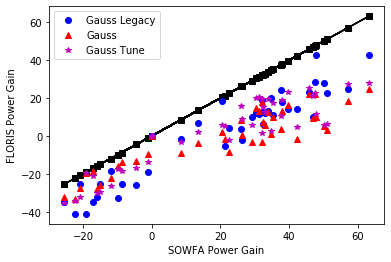

In [16]:
# How does this look in absolute terms?
fig, ax = plt.subplots()
ax.plot(df_sub.sowfa_1,df_sub.sowfa_1,'ks-')
ax.plot(df_sub.sowfa_1,df_sub.power_gauss_legacy,'bo-',label='Gauss Legacy',ls='None')
ax.plot(df_sub.sowfa_1,df_sub.power_gauss,'r^-',label='Gauss',ls='None')
ax.plot(df_sub.sowfa_1,df_sub.power_gauss_tune,'m*-',label='Gauss Tune',ls='None')
ax.legend()
ax.set_xlabel('SOWFA Power Gain')
ax.set_ylabel('FLORIS Power Gain')

Wake velocity parameter alpha set to 0.58
Wake velocity parameter beta set to 0.077
Wake velocity parameter calculate_VW_velocities set to True
Wake velocity parameter eps_gain set to 3.0
Wake velocity parameter ka set to 0.22077999999999998
Wake velocity parameter kb set to 0.002
Wake velocity parameter use_yaw_added_recovery set to True
Wake velocity parameter yaw_recovery_alpha set to 0.03
Wake deflection parameter ad set to 0.0
Wake deflection parameter alpha set to 0.58
Wake deflection parameter bd set to 0.0
Wake deflection parameter beta set to 0.077
Wake deflection parameter eps_gain set to 0.3
Wake deflection parameter ka set to 0.38
Wake deflection parameter kb set to 0.004
Wake deflection parameter use_secondary_steering set to True
Wake turbulence parameter ti_ai set to 0.8
Wake turbulence parameter ti_constant set to 0.73
Wake turbulence parameter ti_downstream set to -0.275
Wake turbulence parameter ti_initial set to 0.1
gauss
gauss_legacy
gauss_tune


/Users/pfleming/opt/anaconda3/envs/floris/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Text(0, 0.5, 'FLORIS Power Gain')

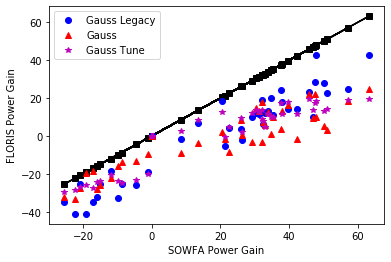

In [20]:
# Turn up alpha?

(fi_tune, floris_color, floris_label) = fi_dict['g_tune']
model_params = fi_tune.get_model_parameters()
model_params['Wake Velocity Parameters']['yaw_recovery_alpha'] =  0.03 # * .001
model_params['Wake Velocity Parameters']['eps_gain'] =  0.3 * 10

fi_tune.set_model_parameters(model_params)
fi_dict['g_tune'] = (fi_tune, 'm', 'gauss_tune')

for floris_key in fi_dict:
    (fi, floris_color, floris_label) = fi_dict[floris_key]
    
    t1_powers = get_t1_powers(fi, floris_label, df)
    
    power_key = 'power_' + floris_label
    df[power_key] = t1_powers

df['sowfa_1'] = df.power.apply(lambda x: x[1])    
    
df_sub = df[['layout_x','layout_y','yaw','sowfa_TI','power_gauss','power_gauss_legacy','power_gauss_tune','sowfa_1']]
    


# Store all the base powers
base_powers = dict()
for i, row in df_sub.iterrows():
    for channel in ['power_gauss','power_gauss_legacy','power_gauss_tune','sowfa_1']:
        base_powers[row.layout_x, row.layout_y, row.sowfa_TI,channel] = get_base_power(df_sub, row.layout_x, row.layout_y, row.sowfa_TI,channel)
        
# Now look change
use_absolute = False
for i, row in df_sub.iterrows():
    for channel in ['power_gauss','power_gauss_legacy','power_gauss_tune','sowfa_1']:
        base_power = base_powers[row.layout_x, row.layout_y, row.sowfa_TI,channel]
        if use_absolute:
            df_sub.loc[i,channel] = df_sub.loc[i,channel] - base_power
        else:
            df_sub.loc[i,channel] = 100. * (df_sub.loc[i,channel] - base_power)/base_power
            
# How does this look in absolute terms?
fig, ax = plt.subplots()
ax.plot(df_sub.sowfa_1,df_sub.sowfa_1,'ks-')
ax.plot(df_sub.sowfa_1,df_sub.power_gauss_legacy,'bo-',label='Gauss Legacy',ls='None')
ax.plot(df_sub.sowfa_1,df_sub.power_gauss,'r^-',label='Gauss',ls='None')
ax.plot(df_sub.sowfa_1,df_sub.power_gauss_tune,'m*-',label='Gauss Tune',ls='None')
ax.legend()
ax.set_xlabel('SOWFA Power Gain')
ax.set_ylabel('FLORIS Power Gain')

Text(0, 0.5, 'FLORIS Power')

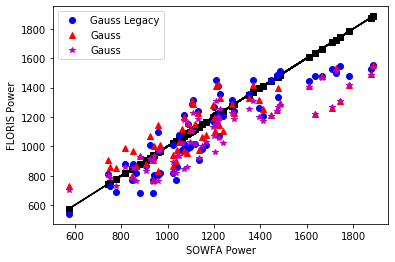

In [18]:
# How does this look in absolute terms?
fig, ax = plt.subplots()
ax.plot(df.sowfa_1,df.sowfa_1,'ks-')
ax.plot(df.sowfa_1,df.power_gauss_legacy,'bo-',label='Gauss Legacy',ls='None')
ax.plot(df.sowfa_1,df.power_gauss,'r^-',label='Gauss',ls='None')
ax.plot(df.sowfa_1,df.power_gauss_tune,'m*-',label='Gauss',ls='None')
ax.legend()
ax.set_xlabel('SOWFA Power')
ax.set_ylabel('FLORIS Power')

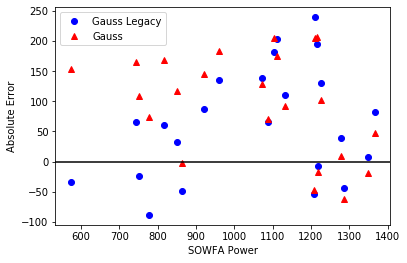

In [10]:
# Now in terms of error distributions
df['Gauss_Error'] = df.power_gauss - df.sowfa_1
df['Gauss_Legacy_Error'] = df.power_gauss_legacy - df.sowfa_1

fig, ax = plt.subplots()
# ax.plot(df.sowfa_1,df.sowfa_1,'ks-')
ax.plot(df.sowfa_1,df.Gauss_Legacy_Error,'bo-',label='Gauss Legacy',ls='None')
ax.plot(df.sowfa_1,df.Gauss_Error,'r^-',label='Gauss',ls='None')
ax.set_xlabel('SOWFA Power')
ax.set_ylabel('Absolute Error')
ax.axhline(0,color='k')
ax.legend()

Shows that previous version of gauss had reasonable calibration for deeper wakes but under-forecasted medium, probably not wide enough

## How do the overall errors compare

In [11]:
def compute_rms(df,floris_column):
    error_column = df[floris_column] 
    return np.sqrt(np.sum((error_column**2))/len(error_column))

In [12]:
print(compute_rms(df,'Gauss_Legacy_Error'))
print(compute_rms(df,'Gauss_Error'))

110.89770917628563
127.25599708134250419


New version without tuning is, as we know, worse

## Try to find an improved tuning for gauss ka/kb

In [13]:
# Define a tuning error function
(fi, floris_color, floris_label) = fi_dict['g']
fi_tune = copy.deepcopy(fi)
model_params = fi_tune.get_model_parameters()


def tuning_error_function(x): #where x = [ka, kb]
    
    # Change the parameters
    model_params['Wake Velocity Parameters']['ka'] = x[0] * 0.38 # how much to scale inital by
    model_params['Wake Velocity Parameters']['kb'] = .002 # x[1] * 0.004 * 10
    fi_tune.set_model_parameters(model_params,verbose=False)
    
    # Get the powers for each case
    t1_powers = np.zeros_like(df.sowfa_1.values)
    num_case = len(t1_powers)
    for idx, (i, row) in enumerate(df.iterrows()):

        # Determine free-stream wind speed column
        freestream_name = 'freestream_gauss'
        
        # Match the layout

        fi_tune.reinitialize_flow_field(layout_array=[row.layout_x,row.layout_y],
                                   wind_speed=[row[freestream_name]],
                                  turbulence_intensity=[row.freestream_ti])


        fi_tune.calculate_wake()
        
        t1_powers[idx] = fi_tune.get_turbine_power()[1]/1000.
        
    # Return the RMS error
    error_values = df.sowfa_1.values - t1_powers
    rms = np.sqrt(np.sum((error_values**2))/num_case)
    print(x,x[0] * 0.38,x[1] * 0.004,rms)
    return rms
        
        
    

In [14]:
# Find well fit values
result = minimize(tuning_error_function, x0=[1, 1],bounds=[(0.001,100.),(0.0001,100.)])

[1. 1.] 0.38 0.004 117.29003094175701
[1.00000001 1.        ] 0.3800000038 0.004 117.29003256905182
[1.         1.00000001] 0.38 0.00400000004 117.29003094175701
[0.001 1.   ] 0.00038 0.004 200.52558391181415
[0.00100001 1.        ] 0.0003800038 0.004 200.52557993779098
[1.00000000e-03 1.00000001e+00] 0.00038 0.00400000004 200.52558391181415
[0.64700259 1.        ] 0.24586098330028286 0.004 70.58637618014723
[0.6470026 1.       ] 0.2458609871002829 0.004 70.5863767629329
[0.64700259 1.00000001] 0.24586098330028286 0.00400000004 70.58637618014723
[0.45004707 1.        ] 0.17101788739153023 0.004 77.27287553092074
[0.45004708 1.        ] 0.17101789119153024 0.004 77.27287422328136
[0.45004707 1.00000001] 0.17101788739153023 0.00400000004 77.27287553092074
[0.58395906 1.        ] 0.22190444230228432 0.004 68.60553069482802
[0.58395907 1.        ] 0.22190444610228435 0.004 68.60553072070336
[0.58395906 1.00000001] 0.22190444230228432 0.00400000004 68.60553069482802
[0.58102991 1.        ] 

In [15]:
result.x

array([0.58129175, 1.        ])

In [16]:
result.x

array([0.58129175, 1.        ])

In [17]:
# Based on the above analysis, let's just assume that an approximate 50% drop
# Add this tuned value to dictionary and compare
model_params['Wake Velocity Parameters']['ka'] = 0.38 * .581 # result.x[0] # 0.38
model_params['Wake Velocity Parameters']['kb'] = 0.002 # result.x[1] # 0.004
fi_tune.set_model_parameters(model_params)

fi_dict['g_tune'] = (fi_tune, 'm', 'gauss_tune')

Wake velocity parameter alpha set to 0.58
Wake velocity parameter beta set to 0.077
Wake velocity parameter calculate_VW_velocities set to True
Wake velocity parameter eps_gain set to 0.3
Wake velocity parameter ka set to 0.22077999999999998
Wake velocity parameter kb set to 0.002
Wake velocity parameter use_yaw_added_recovery set to True
Wake velocity parameter yaw_recovery_alpha set to 0.03
Wake deflection parameter ad set to 0.0
Wake deflection parameter alpha set to 0.58
Wake deflection parameter bd set to 0.0
Wake deflection parameter beta set to 0.077
Wake deflection parameter eps_gain set to 0.3
Wake deflection parameter ka set to 0.38
Wake deflection parameter kb set to 0.004
Wake deflection parameter use_secondary_steering set to True
Wake turbulence parameter ti_ai set to 0.8
Wake turbulence parameter ti_constant set to 0.73
Wake turbulence parameter ti_downstream set to -0.275
Wake turbulence parameter ti_initial set to 0.1


In [18]:
# Recalculate
for floris_key in fi_dict:
    (fi, floris_color, floris_label) = fi_dict[floris_key]
    
    t1_powers = get_t1_powers(fi, floris_label, df)
    
    power_key = 'power_' + floris_label
    df[power_key] = t1_powers

gauss
gauss_legacy
gauss_tune


Text(0, 0.5, 'FLORIS Power')

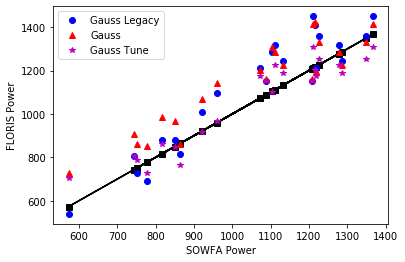

In [19]:
# How does this look in absolute terms?
fig, ax = plt.subplots()
ax.plot(df.sowfa_1,df.sowfa_1,'ks-')
ax.plot(df.sowfa_1,df.power_gauss_legacy,'bo-',label='Gauss Legacy',ls='None')
ax.plot(df.sowfa_1,df.power_gauss,'r^-',label='Gauss',ls='None')
ax.plot(df.sowfa_1,df.power_gauss_tune,'m*-',label='Gauss Tune',ls='None')
ax.legend()
ax.set_xlabel('SOWFA Power')
ax.set_ylabel('FLORIS Power')

In [20]:
df['Gauss_Tune_Error'] = df.power_gauss_tune - df.sowfa_1
print(compute_rms(df,'Gauss_Legacy_Error'))
print(compute_rms(df,'Gauss_Error'))
print(compute_rms(df,'Gauss_Tune_Error'))

110.89770917628563
127.25599708134250419
68.60211823939645362


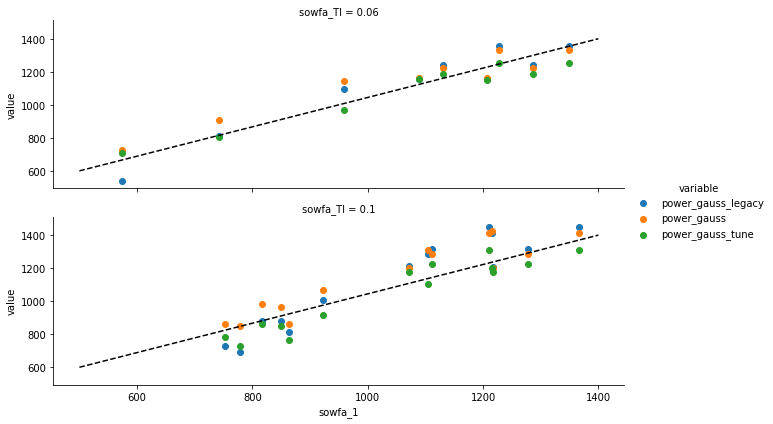

In [21]:
# Lets replot this by sowfa ti
df_sub = df[['sowfa_TI','sowfa_1','power_gauss_legacy','power_gauss','power_gauss_tune']]
df_sub = pd.melt(df_sub,id_vars=['sowfa_TI','sowfa_1'])
g = sns.FacetGrid(df_sub,row='sowfa_TI',hue='variable',aspect=3)
g.map(plt.scatter,'sowfa_1','value')
g.add_legend()
for ax in g.axes.flatten():
    ax.plot([500,1400],[600,1400],'k--')

In [22]:
# Save this new floris dictionary
fi_dict


{'g': (<floris.tools.floris_interface.FlorisInterface at 0x109807950>,
  'r',
  'gauss'),
 'gl': (<floris.tools.floris_interface.FlorisInterface at 0x11b34b350>,
  'b',
  'gauss_legacy'),
 'g_tune': (<floris.tools.floris_interface.FlorisInterface at 0x11b3ea050>,
  'm',
  'gauss_tune')}

In [23]:
pickle.dump( fi_dict, open( "floris_models_2.p", "wb" ) )